In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pandas_datareader import data,wb # 这里需要安装  pip install pandas-datareader

In [4]:
from pandas_datareader import data,wb

In [20]:
pufa = data.DataReader('600000.ss',data_source='yahoo',start = '2016-1-1')# 浦发银行自2018年开始的股票数据，A股后缀加.ss

In [21]:
pufa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,12.7832,12.7832,12.2727,12.4475,11.703192,60404072
2016-01-05,12.2448,12.6294,12.1678,12.5594,11.808400,83018354
2016-01-06,12.5175,12.6853,12.3706,12.6573,11.900446,66884894
2016-01-07,12.4475,12.5175,12.1678,12.2448,11.512611,16231185
2016-01-08,12.4056,12.5035,11.8252,12.2308,11.499449,102843163


In [22]:
pufa.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,9.61,9.65,9.50,9.57,9.469999,12402837
2018-07-11,9.37,9.44,9.32,9.38,9.281985,15203933
2018-07-12,9.41,9.61,9.39,9.57,9.469999,19704837
2018-07-13,9.57,9.58,9.46,9.49,9.490000,15026339
2018-07-16,9.50,9.54,9.34,9.41,9.410000,14414119


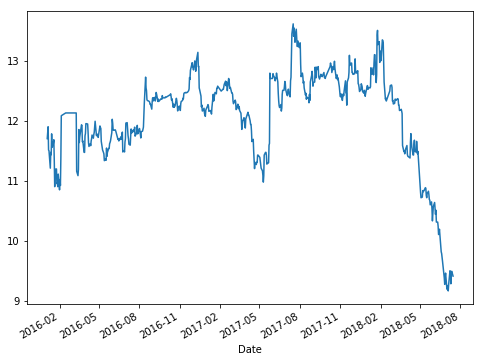

In [23]:
pufa['Adj Close'].plot(figsize=(8,6))

In [24]:
p_yue=pufa['Adj Close'].resample('M').ohlc()# 调整后收盘价降采样为月，onlc

In [25]:
p_yue

,open,high,low,close
Date,,,,
2016-01-31,11.703192,11.900446,10.901103,11.111522
2016-02-29,10.848545,12.130608,10.848545,12.130608
2016-03-31,12.130608,12.130608,11.085196,11.788750
2016-04-30,11.953097,11.992492,11.571751,11.722936
2016-05-31,11.913610,12.025399,11.335008,12.025399
2016-06-30,11.959679,11.959679,11.480613,11.698526
2016-07-31,11.961567,11.968991,11.593329,11.796203
2016-08-31,11.871315,12.727931,11.713569,12.382257
2016-09-30,12.329708,12.472412,12.322186,12.389777


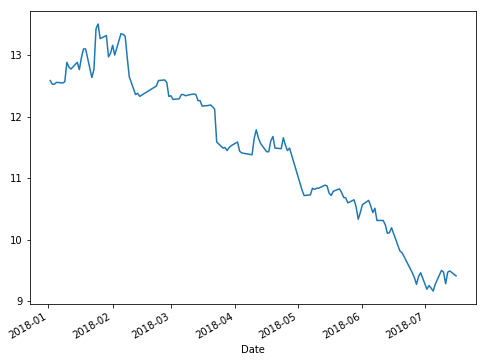

In [27]:
pufa['Adj Close'].loc['2018'].plot(figsize=(8,6))

浦发从2016年至今的收益情况

In [28]:
pufa_18=(pufa['Adj Close'][-1] - pufa['Adj Close'][0])/(pufa['Adj Close'][0])

In [29]:
pufa_18#至今收益是负的近20%

-0.19594585818979982

In [30]:
y_num = pufa.index[-1].year - pufa.index[0].year
y_num

2

to_period()以什么形式的时期，level=0用索引聚合

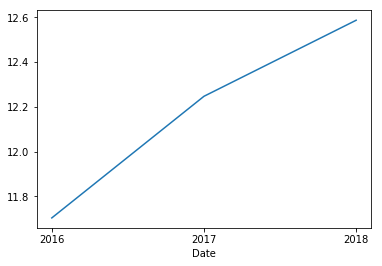

In [43]:
pufa['Adj Close'].to_period('A').groupby(level=0).first().plot()#以年的形式，并以索引来groupby，取每年第一个开盘价格

rolling(window=) 股票分析中常用的窗口函数

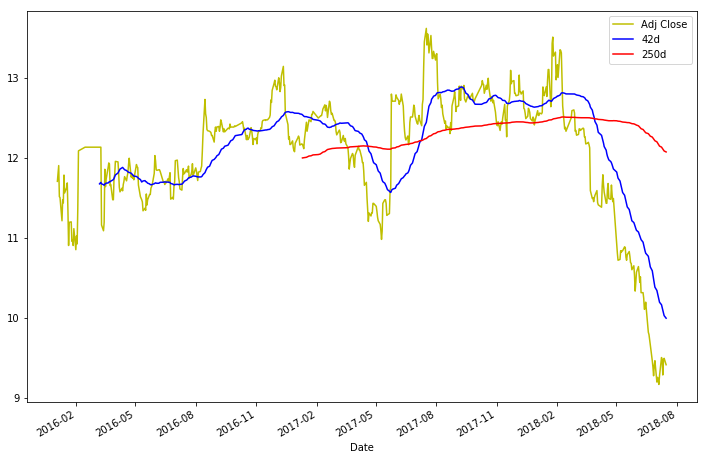

In [44]:
pufa['42d'] = pufa['Adj Close'].rolling(window=42).mean()#42天均值
pufa['250d'] = pufa['Adj Close'].rolling(window=250).mean()#250天均值
pufa[['Adj Close','42d','250d']].plot(figsize=(12,8),color = ['y','b','r'])

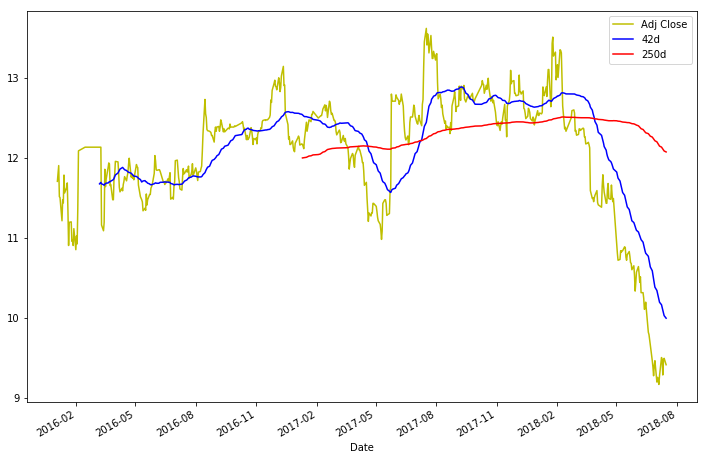

In [47]:
pufa['42d']=pufa['Adj Close'].rolling(window=42).mean()
pufa['250d']=pufa['Adj Close'].rolling(window=250).mean()
pufa[['Adj Close','42d','250d']].plot(figsize=(12,8),color=list('ybr'))

对数分析

对数收益率波动大一般是下行区间

In [51]:
pufa['duishu'] = np.log(pufa['Adj Close']/pufa['Adj Close'].shift(1))   #shifting 指的是沿着时间轴将数据前移或后移。

In [ ]:
pufa['duishu']=np.log(pufa['Adj Close']/pufa['Adj Close'].shift(1)) #shift(1)数据向前移动

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D17DF3F7F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D17E356BA8>], dtype=object)

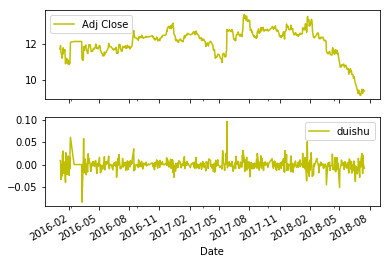

In [53]:
pufa[['Adj Close','duishu']].plot(subplots=True,color='y')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D17DF0FDD8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D17DF93A90>], dtype=object)

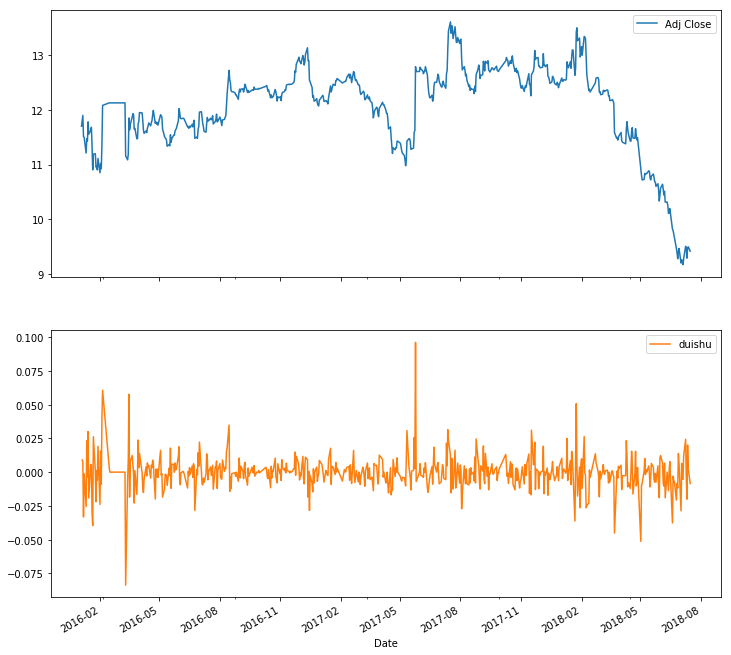

In [52]:
pufa[['Adj Close','duishu']].plot(subplots = True,figsize=(12,12))